In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! cp "/content/drive/My Drive/Dataset/dogs-vs-cats/sampleSubmission.csv" /content/
! cp "/content/drive/My Drive/Dataset/dogs-vs-cats/test1.zip" /content/
! cp "/content/drive/My Drive/Dataset/dogs-vs-cats/train.zip" /content/

In [ ]:
#解壓
! unzip /content/test1.zip > data_unzip.log
! unzip /content/train.zip > data_unzip.log

In [ ]:
import os
import numpy as np

#影像的輸入大小
im_W = 100
im_H = 100

#影像的輸入維度
datachannel = 3

#影像的path
class_path = r"/content/train"

#影像該位置的所有檔案名稱
class_filenames = os.listdir(class_path)

#建立空陣列並定義大小，將給予輸入存取的空間：根據影像數量與輸入大小及維度
data_1d = np.empty((len(class_filenames), im_W*im_H*datachannel), dtype="uint8")
data_2d = np.empty((len(class_filenames), im_W,im_H, datachannel), dtype="uint8")

#建立皆為0且檔案數量的label
label = [0] * len(class_filenames)

In [ ]:
from PIL import Image

#塞制空陣列的輸入與label
for i in range(len(class_filenames)):
    
    #label根據檔案名字前一個字，取代之前建利皆為0的label
    if(class_filenames[i][0] == 'c'):
        label[i] = 0
    if(class_filenames[i][0] == 'd'):
        label[i] = 1
    
    #每一影像讀取
    img = Image.open(class_path + "/" + class_filenames[i])
    
    #每一影像改變大小
    reimg = img.resize((im_W,im_H,))
    
    #將該影像轉成陣列
    npimg_2d = np.asarray(reimg, dtype="uint8")
    npimg_1d = npimg_2d.flatten()
    
    #持續將影像陣列蓋掉之前空陣列
    data_1d[i,:] = npimg_1d
    data_2d[i,:,:,:] = npimg_2d

In [ ]:
#正規化處理
non_data_1d = data_1d.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
from collections import Counter

#打印出影像的維度與標籤的維度
print("影像1d的維度：", data_1d.shape)
print("影像2d的維度：", data_2d.shape)
print("標籤的維度：", len(label)) 

#打印出訓練集與測試集的每個類別數量
print("訓練集標籤數量：%s" %(len(label)))
print("訓練集標籤的類別數量：",Counter(label))

#將Label轉為One-hot-encode
label_ohe = to_categorical(label)

print("原始標籤：", label[0])
print("獨熱編碼標籤：", label_ohe[0])

Using TensorFlow backend.


影像1d的維度： (25000, 30000)
影像2d的維度： (25000, 100, 100, 3)
標籤的維度： 25000
訓練集標籤數量：25000
訓練集標籤的類別數量： Counter({1: 12500, 0: 12500})
原始標籤： 1
獨熱編碼標籤： [0. 1.]


(100, 100, 3)
1


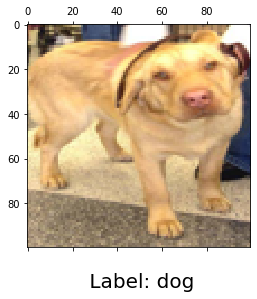

In [ ]:
import matplotlib.pyplot as plt

feature_name = ['cat', 'dog'] 

first_label = label[0]
first_img = data_1d[0].reshape(100,100,3)
#first_img = data_2d[0]
first_label_name = feature_name[first_label]

print(first_img.shape)
print(first_label)

plt.matshow(first_img)
plt.xlabel("\n Label: %s" %(first_label_name), size=20)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(1000, input_shape=(100*100*3,), activation="relu"))
model.add(Dense(500, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              30001000  
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 30,551,701
Trainable params: 30,551,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['acc'])

In [ ]:
history = model.fit(x=non_data_1d, y=label, batch_size=100, epochs=300, validation_split= 0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/300
22500/22500 [==============================] - 119s 5ms/step - loss: 1.0918 - acc: 0.5455 - val_loss: 0.6626 - val_acc: 0.6016
Epoch 2/300
22500/22500 [==============================] - 118s 5ms/step - loss: 0.6731 - acc: 0.5894 - val_loss: 0.6529 - val_acc: 0.6088
Epoch 3/300
22500/22500 [==============================] - 119s 5ms/step - loss: 0.6557 - acc: 0.6095 - val_loss: 0.6624 - val_acc: 0.5932
Epoch 4/300
22500/22500 [==============================] - 118s 5ms/step - loss: 0.6484 - acc: 0.6194 - val_loss: 0.6434 - val_acc: 0.6240
Epoch 5/300
22500/22500 [==============================] - 117s 5ms/step - loss: 0.6431 - acc: 0.6248 - val_loss: 0.6479 - val_acc: 0.6104
Epoch 6/300
22500/22500 [==============================] - 118s 5ms/step - loss: 0.6374 - acc: 0.6329 - val_loss: 0.6640 - val_acc: 0.6020
Epoch 7/300
22500/22500 [==============================] - 118s 5ms/step - loss: 0.6334 - acc: 0.6386 - val_loss: 0.6

In [ ]:
from keras.models import load_model

#儲存模型
model.save('mlp_dog_vs_cat.h5')

#載入模型
from tensorflow.keras.models import load_model

model = load_model('mlp_dog_vs_cat.h5')

(630, 565, 3)


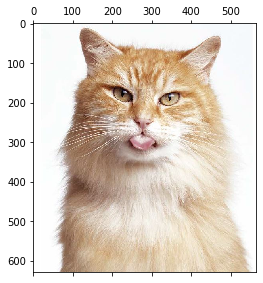

array([[0.15229979]], dtype=float32)

In [ ]:
import cv2
img = cv2.imread('cat3.jpg')
#img = cv2.imread('dog.jpg')
print(img.shape)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.matshow(img)
plt.show()

img = cv2.resize(img, (100,100))

img = img.flatten()
img = img.reshape((1,30000))

img = img.astype('float32')/255
model.predict(img)